## Import packages

In [16]:
import pandas as pd
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

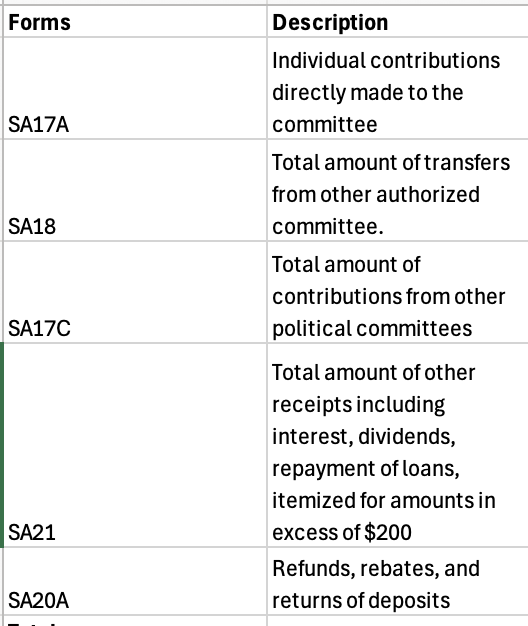

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses.

In [17]:
filing = fecfile.from_http('1805248') #file no. 
filing

{'itemizations': {'Schedule A': [{'form_type': 'SA17A',
    'filer_committee_id_number': 'C00703975',
    'transaction_id': '6883091',
    'back_reference_tran_id_number': '6883091E',
    'back_reference_sched_name': 'SA17A',
    'entity_type': 'IND',
    'contributor_organization_name': '',
    'contributor_last_name': 'Attia',
    'contributor_first_name': 'Patricia',
    'contributor_middle_name': '',
    'contributor_prefix': '',
    'contributor_suffix': '',
    'contributor_street_1': '165 W End Ave',
    'contributor_street_2': '',
    'contributor_city': 'New York',
    'contributor_state': 'NY',
    'contributor_zip_code': '100235503',
    'election_code': 'P2024',
    'election_other_description': '',
    'contribution_date': datetime.datetime(2024, 4, 30, 0, 0, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
    'contribution_amount': 360.0,
    'contribution_aggregate': 360.0,
    'contribution_purpose_descrip': '',
    'contributor_employer': 'Self-Employed',
   

## Schedule A: Contributions

Schedule B is for expenses

In [19]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
pd.set_option('display.max_columns', None)
df

form_type filer_committee_id_number transaction_id  \
0          SA17A                 C00703975        6883091   
1          SA17A                 C00703975       6883091E   
2          SA17A                 C00703975        9059829   
3          SA17A                 C00703975        9059952   
4          SA17A                 C00703975        7716543   
...          ...                       ...            ...   
404378     SA20A                 C00703975       10175800   
404379     SA20A                 C00703975       10175801   
404380     SA20A                 C00703975       10175802   
404381     SA20A                 C00703975       10175759   
404382      SA21                 C00703975        9676007   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
0                           6883091E                     SA17A         IND   
1                                                                      PAC   
2                                                                      IND   
3                            9059829                     SA17A         IND   
4                           7716543E                     SA17A         IND   
...                              ...                       ...         ...   
404378                                                                 ORG   
404379                                                                 ORG   
404380                                                                 ORG   
404381                                                                 COM   
404382                                                                 ORG   

       contributor_organization_name contributor_last_name  \
0                                                    Attia   
1                            ActBlue                         
2                                                    Attia   
3                                                    Attia   
4                                                    Attia   
...                              ...                   ...   
404378                         Gusto                         
404379                         Gusto                         
404380                         Gusto                         
404381            Biden Victory Fund                         
404382              Amalgamated Bank                         

       contributor_first_name contributor_middle_name contributor_prefix  \
0                    Patricia                                              
1                                                                          
2                    Patricia                                              
3                    Patricia                                              
4                    Patricia                                              
...                       ...                     ...                ...   
404378                                                                     
404379                                                                     
404380                                                                     
404381                                                                     
404382                                                                     

       contributor_suffix contributor_street_1 contributor_street_2  \
0                                165 W End Ave                        
1                                PO Box 441146                        
2                                165 W End Ave                        
3                                165 W End Ave                        
4                                165 W End Ave                        
...                   ...                  ...                  ...   
404378                             525 20Th St                        
404379                             525 20Th St                        
404380                             525 2

In [20]:
df.form_type.value_counts()

SA17A    258362
SA18     146009
SA17C         7
SA20A         4
SA21          1
Name: form_type, dtype: int64

## SA17A

In [46]:
sa17a= df[df.form_type=='SA17A']
sa17a

form_type filer_committee_id_number transaction_id  \
0          SA17A                 C00703975        6883091   
1          SA17A                 C00703975       6883091E   
2          SA17A                 C00703975        9059829   
3          SA17A                 C00703975        9059952   
4          SA17A                 C00703975        7716543   
...          ...                       ...            ...   
258357     SA17A                 C00703975       9056824E   
258358     SA17A                 C00703975        9495777   
258359     SA17A                 C00703975       9495777E   
258360     SA17A                 C00703975        9487334   
258361     SA17A                 C00703975       9487334E   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
0                           6883091E                     SA17A         IND   
1                                                                      PAC   
2                                                                      IND   
3                            9059829                     SA17A         IND   
4                           7716543E                     SA17A         IND   
...                              ...                       ...         ...   
258357                                                                 PAC   
258358                      9495777E                     SA17A         IND   
258359                                                                 PAC   
258360                      9487334E                     SA17A         IND   
258361                                                                 PAC   

       contributor_organization_name contributor_last_name  \
0                                                    Attia   
1                            ActBlue                         
2                                                    Attia   
3                                                    Attia   
4                                                    Attia   
...                              ...                   ...   
258357                       ActBlue                         
258358                                           Zyscovich   
258359                       ActBlue                         
258360                                           Zyskowski   
258361                       ActBlue                         

       contributor_first_name contributor_middle_name contributor_prefix  \
0                    Patricia                                              
1                                                                          
2                    Patricia                                              
3                    Patricia                                              
4                    Patricia                                              
...                       ...                     ...                ...   
258357                                                                     
258358                Bernard                                              
258359                                                                     
258360                   Lori                                              
258361                                                                     

       contributor_suffix contributor_street_1 contributor_street_2  \
0                                165 W End Ave                        
1                                PO Box 441146                        
2                                165 W End Ave                        
3                                165 W End Ave                        
4                                165 W End Ave                        
...                   ...                  ...                  ...   
258357                           PO Box 441146                        
258358                       100 Biscayne Blvd                Fl 27   
258359                           PO Box 

### SA17A: removing the memo code

In [47]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

form_type filer_committee_id_number transaction_id  \
12         SA17A                 C00703975        7918863   
14         SA17A                 C00703975        7926078   
16         SA17A                 C00703975        7947614   
18         SA17A                 C00703975        7941720   
20         SA17A                 C00703975        7905336   
...          ...                       ...            ...   
258352     SA17A                 C00703975        9474521   
258354     SA17A                 C00703975        9297716   
258356     SA17A                 C00703975        9056824   
258358     SA17A                 C00703975        9495777   
258360     SA17A                 C00703975        9487334   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
12                          7918863E                     SA17A         IND   
14                          7926078E                     SA17A         IND   
16                          7947614E                     SA17A         IND   
18                          7941720E                     SA17A         IND   
20                          7905336E                     SA17A         IND   
...                              ...                       ...         ...   
258352                      9474521E                     SA17A         IND   
258354                      9297716E                     SA17A         IND   
258356                      9056824E                     SA17A         IND   
258358                      9495777E                     SA17A         IND   
258360                      9487334E                     SA17A         IND   

       contributor_organization_name contributor_last_name  \
12                                             A Gittleman   
14                                                 A Jones   
16                                               A Lovette   
18                                              A Magnuson   
20                                                  A****N   
...                              ...                   ...   
258352                                              Zylman   
258354                                             Zylstra   
258356                                             Zylstra   
258358                                           Zyscovich   
258360                                           Zyskowski   

       contributor_first_name contributor_middle_name contributor_prefix  \
12                       Dean                                              
14                      Linda                                              
16                   Patricia                                              
18                     Martha                                              
20                     ROBERT                                              
...                       ...                     ...                ...   
258352                 Carole                                              
258354                  Carol                                              
258356                  Janet                                              
258358                Bernard                                              
258360                   Lori                                              

       contributor_suffix  contributor_street_1 contributor_street_2  \
12                                 10 Balsam Ct                        
14                            17 Dennis Town Rd                        
16                                4 Prospect St                        
18                                749 Dunham Ln                        
20                               137 Harvest Dr                        
...                   ...                   ...                  ...   
258352                     3886 Pemberton Dr SE                        
258354                        16095 N Elkins Rd                        
258356                        6

In [48]:
sa17a_memo.contribution_amount.sum()

17010754.76

### SA17A: transaction id 

I tried another way, which was to match the transaction ID and back reference ID. It resulted in a slightly lower number than removing the memo code.

In [41]:
sa17a_filtered = sa17a[sa17a.transaction_id.isin(df.back_reference_tran_id_number)]
sa17a_filtered

form_type filer_committee_id_number transaction_id  \
1          SA17A                 C00703975       6883091E   
2          SA17A                 C00703975        9059829   
5          SA17A                 C00703975       7716543E   
6          SA17A                 C00703975        9059619   
9          SA17A                 C00703975       7681653E   
...          ...                       ...            ...   
258353     SA17A                 C00703975       9474521E   
258355     SA17A                 C00703975       9297716E   
258357     SA17A                 C00703975       9056824E   
258359     SA17A                 C00703975       9495777E   
258361     SA17A                 C00703975       9487334E   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
1                                                                      PAC   
2                                                                      IND   
5                                                                      PAC   
6                                                                      IND   
9                                                                      PAC   
...                              ...                       ...         ...   
258353                                                                 PAC   
258355                                                                 PAC   
258357                                                                 PAC   
258359                                                                 PAC   
258361                                                                 PAC   

       contributor_organization_name contributor_last_name  \
1                            ActBlue                         
2                                                    Attia   
5                            ActBlue                         
6                                                    Attia   
9                            ActBlue                         
...                              ...                   ...   
258353                       ActBlue                         
258355                       ActBlue                         
258357                       ActBlue                         
258359                       ActBlue                         
258361                       ActBlue                         

       contributor_first_name contributor_middle_name contributor_prefix  \
1                                                                          
2                    Patricia                                              
5                                                                          
6                    Patricia                                              
9                                                                          
...                       ...                     ...                ...   
258353                                                                     
258355                                                                     
258357                                                                     
258359                                                                     
258361                                                                     

       contributor_suffix contributor_street_1 contributor_street_2  \
1                                PO Box 441146                        
2                                165 W End Ave                        
5                                PO Box 441146                        
6                                165 W End Ave                        
9                                PO Box 441146                        
...                   ...                  ...                  ...   
258353                           PO Box 441146                        
258355                           PO Box 441146                        
258357                           PO Box 

In [31]:
sa17a_filtered.contribution_amount.sum()

16359568.520000001

In [45]:
sa17a_filtered.to_clipboard(index=False)

## SA18

In [25]:
sa18= df[df.form_type=='SA18']
sa18

form_type filer_committee_id_number transaction_id  \
258369      SA18                 C00703975        8938506   
258370      SA18                 C00703975       10883027   
258371      SA18                 C00703975       10337166   
258372      SA18                 C00703975       10548847   
258373      SA18                 C00703975       10865459   
...          ...                       ...            ...   
404373      SA18                 C00703975       10847712   
404374      SA18                 C00703975       10777600   
404375      SA18                 C00703975       10705536   
404376      SA18                 C00703975       10649269   
404377      SA18                 C00703975       8938506J   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
258369                                                                 COM   
258370                       8938506                      SA18         IND   
258371                       8938506                      SA18         IND   
258372                       8938506                      SA18         IND   
258373                       8938506                      SA18         IND   
...                              ...                       ...         ...   
404373                       8938506                      SA18         IND   
404374                       8938506                      SA18         IND   
404375                       8938506                      SA18         IND   
404376                       8938506                      SA18         IND   
404377                       8938506                      SA18         COM   

          contributor_organization_name contributor_last_name  \
258369               Biden Victory Fund                         
258370                                                 A Bair   
258371                                               A Braboy   
258372                                                 A Cain   
258373                                             A Caldwell   
...                                 ...                   ...   
404373                                                 ZYNSKY   
404374                                              Zyrkowski   
404375                                                   Zysk   
404376                                               Zyskoski   
404377  Biden Victory Fund - Unitemized                         

       contributor_first_name contributor_middle_name contributor_prefix  \
258369                                                                     
258370                 Julene                                              
258371                 Andrea                                              
258372                  David                                              
258373                Deborah                                              
...                       ...                     ...                ...   
404373                   JOHN                                              
404374                   Mary                                              
404375                 Dennis                                              
404376                   Alma                      E.                      
404377                                                                     

       contributor_suffix      contributor_street_1 contributor_street_2  \
258369                          430 S Capitol St SE                        
258370                           1107 Shadyslope Dr                        
258371                     17470 Brookside Trace Ct             Unit 404   
258372                              39 Windridge Rd                        
258373                              23610 39Th Pl W                        
...                   ...                       ...                  ...   
404373                            8400 Disney Pl NE                        
404374                             

In [27]:
sa18= sa18.reset_index(drop=True)
sa18

form_type filer_committee_id_number transaction_id  \
0           SA18                 C00703975        8938506   
1           SA18                 C00703975       10883027   
2           SA18                 C00703975       10337166   
3           SA18                 C00703975       10548847   
4           SA18                 C00703975       10865459   
...          ...                       ...            ...   
146004      SA18                 C00703975       10847712   
146005      SA18                 C00703975       10777600   
146006      SA18                 C00703975       10705536   
146007      SA18                 C00703975       10649269   
146008      SA18                 C00703975       8938506J   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
0                                                                      COM   
1                            8938506                      SA18         IND   
2                            8938506                      SA18         IND   
3                            8938506                      SA18         IND   
4                            8938506                      SA18         IND   
...                              ...                       ...         ...   
146004                       8938506                      SA18         IND   
146005                       8938506                      SA18         IND   
146006                       8938506                      SA18         IND   
146007                       8938506                      SA18         IND   
146008                       8938506                      SA18         COM   

          contributor_organization_name contributor_last_name  \
0                    Biden Victory Fund                         
1                                                      A Bair   
2                                                    A Braboy   
3                                                      A Cain   
4                                                  A Caldwell   
...                                 ...                   ...   
146004                                                 ZYNSKY   
146005                                              Zyrkowski   
146006                                                   Zysk   
146007                                               Zyskoski   
146008  Biden Victory Fund - Unitemized                         

       contributor_first_name contributor_middle_name contributor_prefix  \
0                                                                          
1                      Julene                                              
2                      Andrea                                              
3                       David                                              
4                     Deborah                                              
...                       ...                     ...                ...   
146004                   JOHN                                              
146005                   Mary                                              
146006                 Dennis                                              
146007                   Alma                      E.                      
146008                                                                     

       contributor_suffix      contributor_street_1 contributor_street_2  \
0                               430 S Capitol St SE                        
1                                1107 Shadyslope Dr                        
2                          17470 Brookside Trace Ct             Unit 404   
3                                   39 Windridge Rd                        
4                                   23610 39Th Pl W                        
...                   ...                       ...                  ...   
146004                            8400 Disney Pl NE                        
146005                             

In [28]:
sa18= sa18.drop([0])
sa18

form_type filer_committee_id_number transaction_id  \
1           SA18                 C00703975       10883027   
2           SA18                 C00703975       10337166   
3           SA18                 C00703975       10548847   
4           SA18                 C00703975       10865459   
5           SA18                 C00703975       10646881   
...          ...                       ...            ...   
146004      SA18                 C00703975       10847712   
146005      SA18                 C00703975       10777600   
146006      SA18                 C00703975       10705536   
146007      SA18                 C00703975       10649269   
146008      SA18                 C00703975       8938506J   

       back_reference_tran_id_number back_reference_sched_name entity_type  \
1                            8938506                      SA18         IND   
2                            8938506                      SA18         IND   
3                            8938506                      SA18         IND   
4                            8938506                      SA18         IND   
5                            8938506                      SA18         IND   
...                              ...                       ...         ...   
146004                       8938506                      SA18         IND   
146005                       8938506                      SA18         IND   
146006                       8938506                      SA18         IND   
146007                       8938506                      SA18         IND   
146008                       8938506                      SA18         COM   

          contributor_organization_name contributor_last_name  \
1                                                      A Bair   
2                                                    A Braboy   
3                                                      A Cain   
4                                                  A Caldwell   
5                                                    A Cawood   
...                                 ...                   ...   
146004                                                 ZYNSKY   
146005                                              Zyrkowski   
146006                                                   Zysk   
146007                                               Zyskoski   
146008  Biden Victory Fund - Unitemized                         

       contributor_first_name contributor_middle_name contributor_prefix  \
1                      Julene                                              
2                      Andrea                                              
3                       David                                              
4                     Deborah                                              
5                     Christi                                              
...                       ...                     ...                ...   
146004                   JOHN                                              
146005                   Mary                                              
146006                 Dennis                                              
146007                   Alma                      E.                      
146008                                                                     

       contributor_suffix      contributor_street_1 contributor_street_2  \
1                                1107 Shadyslope Dr                        
2                          17470 Brookside Trace Ct             Unit 404   
3                                   39 Windridge Rd                        
4                                   23610 39Th Pl W                        
5                                   2435 SE Lake Rd                        
...                   ...                       ...                  ...   
146004                            8400 Disney Pl NE                        
146005                             

In [29]:
sa18.contribution_amount.sum()

40666415.879999995

## SA17C

In [43]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
sa17c

index form_type filer_committee_id_number transaction_id  \
0  258362     SA17C                 C00703975        9668926   
1  258363     SA17C                 C00703975        9617988   
2  258364     SA17C                 C00703975       10169464   
3  258365     SA17C                 C00703975        9617944   
4  258366     SA17C                 C00703975       10174718   
5  258367     SA17C                 C00703975        9608807   
6  258368     SA17C                 C00703975        9608808   

  back_reference_tran_id_number back_reference_sched_name entity_type  \
0                                                                 PAC   
1                                                                 PAC   
2                                                                 PAC   
3                                                                 PAC   
4                                                                 PAC   
5                                                                 PAC   
6                                                                 PAC   

                      contributor_organization_name contributor_last_name  \
0                         Social Security Works PAC                         
1          Planned Parenthood Action Fund Inc., PAC                         
2          Planned Parenthood Action Fund Inc., PAC                         
3          Planned Parenthood Action Fund Inc., PAC                         
4                    Occupy Democrats Election Fund                         
5  National Air Traffic Controllers Association PAC                         
6  National Air Traffic Controllers Association PAC                         

  contributor_first_name contributor_middle_name contributor_prefix  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     
5                                                                     
6                                                                     

  contributor_suffix       contributor_street_1 contributor_street_2  \
0                                  PO Box 27380                        
1                                123 William St                        
2                                123 William St                        
3                                123 William St                        
4                                  2021 L St NW              Ste 101   
5                     1325 Massachusetts Ave NW                        
6                     1325 Massachusetts Ave NW                        

  contributor_city contributor_state contributor_zip_code election_code  \
0       Washington                DC            200387380         P2024   
1         New York                NY            100383804         P2024   
2         New York                NY            100383804         P2024   
3         New York                NY            100383804         P2024   
4       Washington                DC            200364914         P2024   
5       Washington                DC            200054171         P2024   
6       Washington                DC            200054171         G2024   

  election_other_description         contribution_date  contribution_amount  \
0                            2024-06-12 00:00:00-04:00               300.00   
1                            2024-06-17 00:00:00-04:00               651.25   
2                            2024-06-24 00:00:00-04:00               239.42   
3                            2024-06-24 00:00:00-04:00               145.60   
4                            2024-06-29 00:00:00-04:00              5000.00   
5                            2024-06-30 00:00:00-04:00              

In [44]:
sa17c.contribution_amount.sum()

16336.27

## SA21

In [37]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

index form_type filer_committee_id_number transaction_id  \
0  404382      SA21                 C00703975        9676007   

  back_reference_tran_id_number back_reference_sched_name entity_type  \
0                                                                 ORG   

  contributor_organization_name contributor_last_name contributor_first_name  \
0              Amalgamated Bank                                                

  contributor_middle_name contributor_prefix contributor_suffix  \
0                                                                 

  contributor_street_1 contributor_street_2 contributor_city  \
0          275 7Th Ave                              New York   

  contributor_state contributor_zip_code election_code  \
0                NY            100016708         P2024   

  election_other_description         contribution_date  contribution_amount  \
0                            2024-06-28 00:00:00-04:00            103715.31   

   contribution_aggregate contribution_purpose_descrip contributor_employer  \
0               824481.09                                                     

  contributor_occupation donor_committee_fec_id donor_committee_name  \
0                                                                      

  donor_candidate_fec_id donor_candidate_last_name donor_candidate_first_name  \
0                                                                               

  donor_candidate_middle_name donor_candidate_prefix donor_candidate_suffix  \
0                                                                             

  donor_candidate_office donor_candidate_state donor_candidate_district  \
0                                                                         

  conduit_name conduit_street1 conduit_street2 conduit_city conduit_state  \
0                                                                           

  conduit_zip_code memo_code memo_text_description reference_code  
0                                  Interest earned

In [38]:
sa21.contribution_amount.sum()

103715.31

## SA 20A

Refunds

In [50]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

index form_type filer_committee_id_number transaction_id  \
0  404378     SA20A                 C00703975       10175800   
1  404379     SA20A                 C00703975       10175801   
2  404380     SA20A                 C00703975       10175802   
3  404381     SA20A                 C00703975       10175759   

  back_reference_tran_id_number back_reference_sched_name entity_type  \
0                                                                 ORG   
1                                                                 ORG   
2                                                                 ORG   
3                                                                 COM   

  contributor_organization_name contributor_last_name contributor_first_name  \
0                         Gusto                                                
1                         Gusto                                                
2                         Gusto                                                
3            Biden Victory Fund                                                

  contributor_middle_name contributor_prefix contributor_suffix  \
0                                                                 
1                                                                 
2                                                                 
3                                                                 

  contributor_street_1 contributor_street_2 contributor_city  \
0          525 20Th St                         San Francisco   
1          525 20Th St                         San Francisco   
2          525 20Th St                         San Francisco   
3  430 S Capitol St SE                            Washington   

  contributor_state contributor_zip_code election_code  \
0                CA            941074345         P2024   
1                CA            941074345         P2024   
2                CA            941074345         P2024   
3                DC            200034024         P2024   

  election_other_description         contribution_date  contribution_amount  \
0                            2024-06-05 00:00:00-04:00                34.97   
1                            2024-06-27 00:00:00-04:00               116.26   
2                            2024-06-27 00:00:00-04:00               377.64   
3                            2024-06-28 00:00:00-04:00            562113.34   

   contribution_aggregate contribution_purpose_descrip contributor_employer  \
0                 4441.44                                                     
1                 4935.34                                                     
2                 4935.34                                                     
3              4274565.52                                                     

  contributor_occupation donor_committee_fec_id donor_committee_name  \
0                                                                      
1                                                                      
2                                                                      
3                                     C00744946   Biden Victory Fund   

  donor_candidate_fec_id donor_candidate_last_name donor_candidate_first_name  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               

  donor_candidate_middle_name donor_candidate_prefix donor_candidate_suffix  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             

  donor_candi

In [51]:
sa20a.contribution_amount.sum()

562642.21